<a href="https://colab.research.google.com/github/Diego15s/DIO-Baires-02-Redu-oDimensionalidade/blob/main/Redu%C3%A7%C3%A3o_Dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

In [2]:
# Fazer upload da imagem
uploaded = files.upload()

# Pegar o nome do arquivo enviado
filename = list(uploaded.keys())[0]

Saving Lenna.png to Lenna.png


(-0.5, 511.5, 511.5, -0.5)

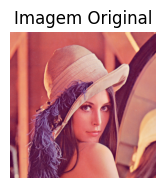

In [3]:
# Abrir a imagem
image = Image.open(filename)

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Imagem Original")
plt.axis("off")

In [4]:
# Converter para escala de cinza manualmente
def rgb_to_grayscale(img):
    img_array = np.array(img)
    gray = 0.2989 * img_array[:, :, 0] + 0.5870 * img_array[:, :, 1] + 0.1140 * img_array[:, :, 2]
    return gray.astype(np.uint8)

gray_image = rgb_to_grayscale(image)

(-0.5, 511.5, 511.5, -0.5)

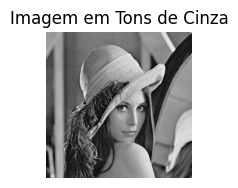

In [5]:
plt.subplot(1,3,2)
plt.imshow(gray_image, cmap='gray')
plt.title("Imagem em Tons de Cinza")
plt.axis("off")

In [6]:
# Binarizar a imagem manualmente com limiarização de Otsu
def otsu_threshold(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    total_pixels = img.size
    current_max, threshold = 0, 0
    sum_total, sum_foreground, weight_background, weight_foreground = np.sum(hist * np.arange(256)), 0, 0, 0

    for i in range(256):
        weight_background += hist[i]
        if weight_background == 0:
            continue
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break
        sum_foreground += i * hist[i]
        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    binary_img = (img >= threshold) * 255
    return binary_img.astype(np.uint8)

binary_image = otsu_threshold(gray_image)


(-0.5, 511.5, 511.5, -0.5)

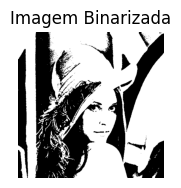

In [7]:
plt.subplot(1,3,3)
plt.imshow(binary_image, cmap='gray')
plt.title("Imagem Binarizada")
plt.axis("off")